1 - Importe as bibliotecas pandas e matplotlib, usando a palavra mágica inline para exibir as visualizações no notebook; e carregue os dados, que estão disponibilizados neste link:dados, em um DataFrame. Assim, você pode carregar os dados pela URI ou salvar em sua máquina e carregá-los localmente;

2 - Crie uma visualização que mostre a proporção de vendas global entre gêneros de jogos da empresa Nintendo;

3 - Crie uma visualização que mostre a proporção de quantidade de jogos por plataforma a partir do ano de 2015.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('dados2.txt')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df.rename({'Rank':'posicao',
           'Name':'nome',
           'Platform':'plataforma',
           'Year':'ano',
           'Genre':'genero',
           'Publisher':'vendedora',
           'NA_Sales':'vendas_brasil',
           'EU_Sales':'vendas_estados_unidos',
           'JP_Sales':'vendas_japao',
           'Other_Sales':'outras_vendas',
           'Global_Sales':'vendas_global',}, axis = 1,  inplace=True)
df.head()

,posicao,nome,plataforma,ano,genero,vendedora,vendas_brasil,vendas_estados_unidos,vendas_japao,outras_vendas,vendas_global
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
nintendoDf = df[df['vendedora'] == 'Nintendo']
nintendoDf.head()

,posicao,nome,plataforma,ano,genero,vendedora,vendas_brasil,vendas_estados_unidos,vendas_japao,outras_vendas,vendas_global
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
grupoGenero = nintendoDf.groupby(by='genero').sum()
grupoGenero

,posicao,ano,vendas_brasil,vendas_estados_unidos,vendas_japao,outras_vendas,vendas_global
genero,,,,,,,
Action,359543,156516.0,63.49,29.02,29.24,6.48,128.18
Adventure,193705,70161.0,17.72,7.66,9.01,1.28,35.71
Fighting,47056,36031.0,27.10,8.64,14.94,2.65,53.35
Misc,523309,200625.0,61.98,51.62,55.25,11.78,180.67
Platform,245890,222146.0,220.14,85.21,102.36,19.47,427.21
Puzzle,327830,148134.0,55.74,26.42,37.09,5.53,124.88
Racing,82066,73967.0,73.55,39.75,29.22,8.81,151.30
Role-Playing,374106,210720.0,105.63,63.92,102.24,13.07,284.90
Shooter,98683,48030.0,51.39,9.85,6.07,2.39,69.73


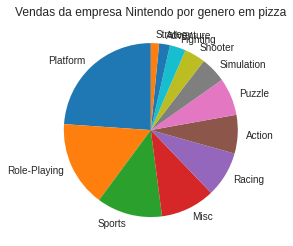

In [9]:
plt.title('Vendas da empresa Nintendo por genero em pizza')
plt.pie(x=grupoGenero['vendas_global'], labels = grupoGenero.index,startangle=90, pctdistance=0.90)
plt.show()

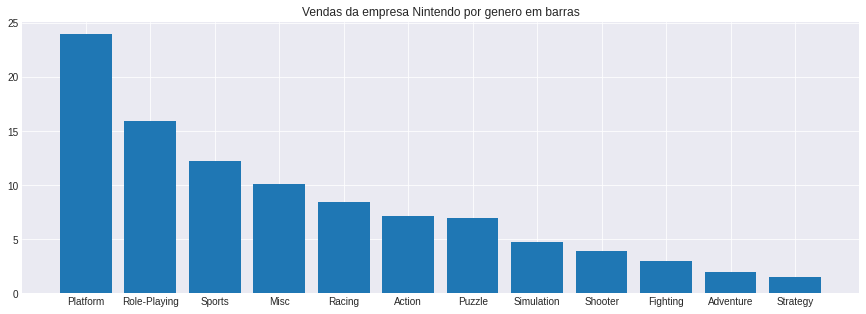

In [7]:
grupoGenero = grupoGenero.sort_values(by='vendas_global',ascending=False)
porcentagens = grupoGenero['vendas_global']*100.0/grupoGenero['vendas_global'].sum()
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,5))
plt.bar(grupoGenero.index,porcentagens)
plt.title('Vendas da empresa Nintendo por genero em barras')
plt.show()

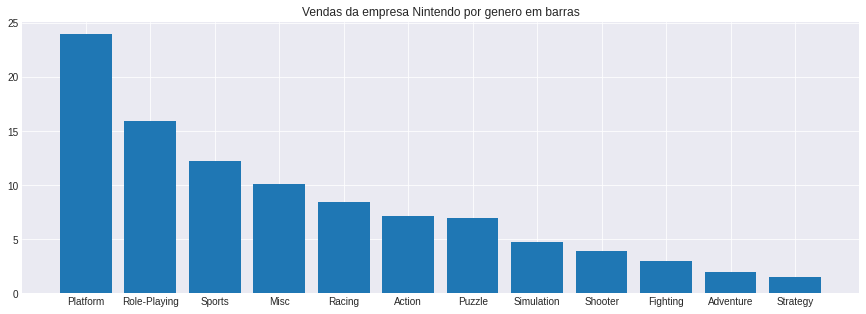

In [8]:
grupoGenero = grupoGenero.sort_values(by='vendas_global',ascending=False)
porcentagens = grupoGenero['vendas_global']*100.0/grupoGenero['vendas_global'].sum()
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,5))
plt.bar(grupoGenero.index,porcentagens)
plt.title('Vendas da empresa Nintendo por genero em barras')
plt.show()

In [151]:
dfOrdemAno = df.sort_values(by='ano',ascending=False)
dfOrdemAno = dfOrdemAno.reset_index(drop=True)
dfOrdemAno.head()

,posicao,nome,plataforma,ano,genero,vendedora,vendas_brasil,vendas_estados_unidos,vendas_japao,outras_vendas,vendas_global
0,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.00,0.02,0.29
1,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.0,0.03,0.00,0.03
2,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.0,0.01,0.00,0.01
3,16441,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.0,0.01,0.00,0.01
4,8295,Shin Megami Tensei IV: Final,3DS,2016.0,Role-Playing,Deep Silver,0.03,0.0,0.14,0.00,0.17


In [155]:
df2015 = dfOrdemAno[dfOrdemAno['ano'] >= 2015.0]
df2015

,posicao,nome,plataforma,ano,genero,vendedora,vendas_brasil,vendas_estados_unidos,vendas_japao,outras_vendas,vendas_global
0,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.00,0.00,0.02,0.29
1,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
2,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
3,16441,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
4,8295,Shin Megami Tensei IV: Final,3DS,2016.0,Role-Playing,Deep Silver,0.03,0.00,0.14,0.00,0.17
...,...,...,...,...,...,...,...,...,...,...,...
957,682,The Legend of Zelda: Majora's Mask 3D,3DS,2015.0,Action,Nintendo,1.14,0.54,0.47,0.17,2.32
958,417,FIFA 16,XOne,2015.0,Sports,Electronic Arts,0.88,2.11,0.00,0.23,3.23
959,16078,Infinite Stratos 2: Love and Purge,PSV,2015.0,Action,5pb,0.00,0.00,0.01,0.00,0.01
960,410,Assassin's Creed Syndicate,PS4,2015.0,Action,Ubisoft,0.80,1.92,0.06,0.50,3.28


In [161]:
grupoPlataforma = df2015.groupby(by='plataforma').sum()
grupoPlataforma = grupoPlataforma.sort_values(by='vendas_global',ascending=False)
grupoPlataforma

,posicao,ano,vendas_brasil,vendas_estados_unidos,vendas_japao,outras_vendas,vendas_global
plataforma,,,,,,,
PS4,2143749,493784.0,52.62,67.91,10.45,23.59,154.58
XOne,1157843,268049.0,40.98,22.61,0.18,6.28,70.03
3DS,1240523,243850.0,6.65,5.34,20.42,1.11,33.59
PS3,1169252,213622.0,5.16,8.23,4.80,2.57,20.81
WiiU,317560,76580.0,8.26,5.89,3.96,1.54,19.67
X360,458504,96728.0,7.47,5.17,0.00,1.21,13.88
PC,1069198,177358.0,3.04,6.87,0.00,0.72,10.67
PSV,2359673,352689.0,0.73,1.58,7.54,0.62,10.52
Wii,34894,8060.0,0.57,0.87,0.00,0.12,1.55


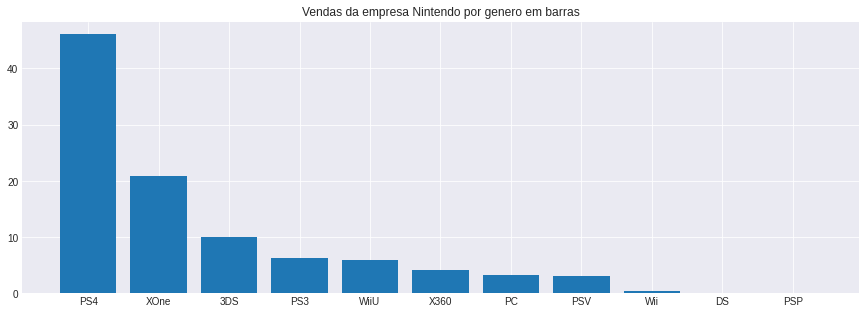

In [158]:

porcentagens = grupoPlataforma['vendas_global']*100.0/grupoPlataforma['vendas_global'].sum()
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,5))
plt.bar(grupoPlataforma.index,porcentagens)
plt.title('Vendas da empresa Nintendo por genero em barras')
plt.show()